In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import *
%matplotlib inline 
sns.set(style="ticks")

In [2]:
sk_data = load_wine()
data = pd.DataFrame(data= np.c_[sk_data['data'], sk_data['target']], columns=sk_data['feature_names'] + ['target'])

In [3]:
# Первые 5 строк датасета
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [4]:
# Размер датасета
data.shape
total_row = data.shape[0]
total_column = data.shape[1]
print('Всего строк: {}\nВсего столбцов: {}'.format(total_row, total_column))

Всего строк: 178
Всего столбцов: 14


In [5]:
# Список колонок
columns = list(data.columns)
print(f'''Стобцы датасета: {', '.join(map(str, columns))}''')

Стобцы датасета: alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline, target


In [6]:
# Список колонок с типами данных
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [7]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0
target - 0


In [8]:
# Основные статистические характеристки набора данных
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [9]:
# Определим уникальные значения для содержания алкоголя
data['alcohol'].unique()

array([14.23, 13.2 , 13.16, 14.37, 13.24, 14.2 , 14.39, 14.06, 14.83,
       13.86, 14.1 , 14.12, 13.75, 14.75, 14.38, 13.63, 14.3 , 13.83,
       14.19, 13.64, 12.93, 13.71, 12.85, 13.5 , 13.05, 13.39, 13.3 ,
       13.87, 14.02, 13.73, 13.58, 13.68, 13.76, 13.51, 13.48, 13.28,
       13.07, 14.22, 13.56, 13.41, 13.88, 14.21, 13.9 , 13.94, 13.82,
       13.77, 13.74, 13.29, 13.72, 12.37, 12.33, 12.64, 13.67, 12.17,
       13.11, 13.34, 12.21, 12.29, 13.49, 12.99, 11.96, 11.66, 13.03,
       11.84, 12.7 , 12.  , 12.72, 12.08, 12.67, 12.16, 11.65, 11.64,
       12.69, 11.62, 12.47, 11.81, 12.6 , 12.34, 11.82, 12.51, 12.42,
       12.25, 12.22, 11.61, 11.46, 12.52, 11.76, 11.41, 11.03, 12.77,
       11.45, 11.56, 11.87, 12.07, 12.43, 11.79, 12.04, 12.86, 12.88,
       12.81, 12.53, 12.84, 13.36, 13.52, 13.62, 12.87, 13.32, 13.08,
       12.79, 13.23, 12.58, 13.17, 13.84, 12.45, 14.34, 12.36, 13.69,
       12.96, 13.78, 13.45, 12.82, 13.4 , 12.2 , 14.16, 13.27, 14.13])

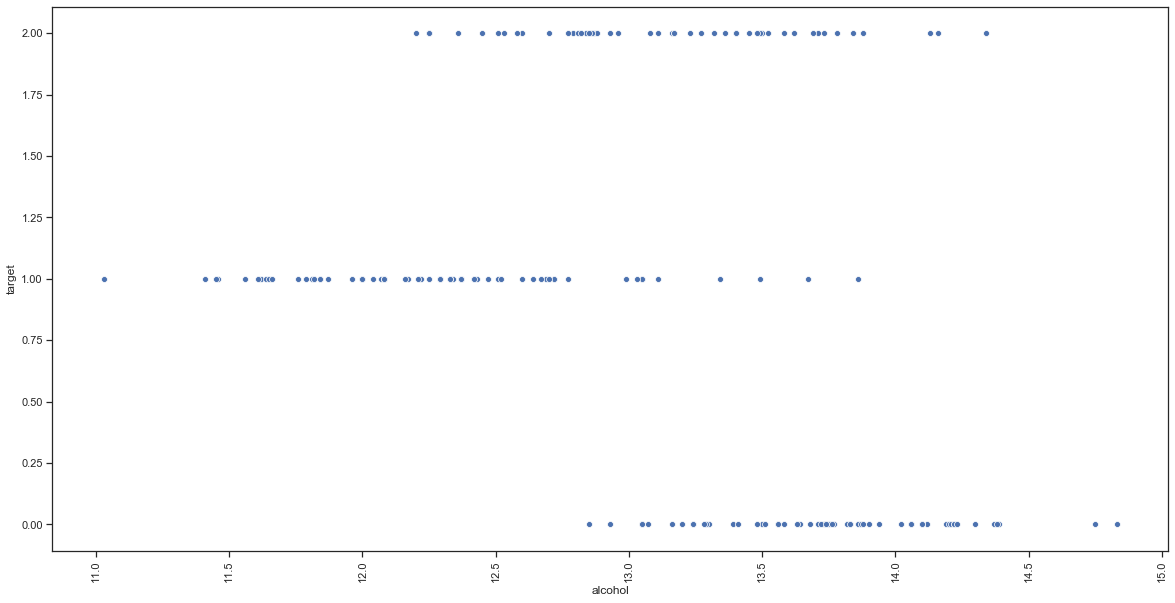

In [10]:
#Диаграмма рассеяния
fig, ax = plt.subplots(figsize=(20,10)) 
plt.xticks(rotation=90)
sns.scatterplot(ax=ax, x='alcohol', y='target', data=data.sort_values(by='target', ascending=False)[:500])


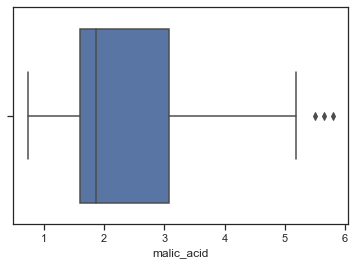

In [11]:
#Ящик с усами
sns.boxplot(x=data['malic_acid'])

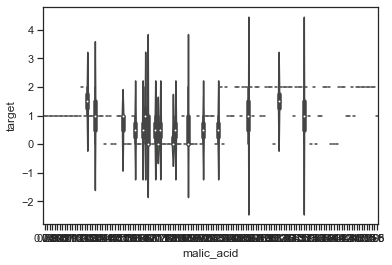

In [12]:
# Распределение параметра malic_acid сгруппированные по target.
sns.violinplot(x='malic_acid', y='target', data=data)

In [13]:
# Корреляционная матрица
data.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


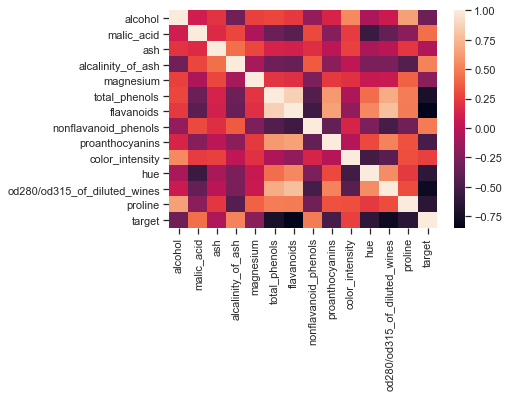

In [14]:
# визуализация корреляционной матрицы "тепловой" диаграммой
sns.heatmap(data.corr())